In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Load the dataset
summer_df = pd.read_csv('Resources/summer.csv')
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
# Review the data types
#summer_df.dtypes
summer_df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [4]:
# Medals by Year
# Group by year and count medals
medals_by_year = summer_df.groupby('Year')['Medal'].count()
print(medals_by_year)

# Results
print(f"The year with the most medals is {medals_by_year.idxmax()} with {medals_by_year.max()} medals.")
print(f"The year with the least medals is {medals_by_year.idxmin()} with {medals_by_year.min()} medals.")
print(f"The total number of medals is {medals_by_year.sum()}.")
print(f"The average number of medals is {medals_by_year.mean()}.")
print(f"The median number of medals is {medals_by_year.median()}.")

Year
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
2012    1949
Name: Medal, dtype: int64
The year with the most medals is 2008 with 2042 medals.
The year with the least medals is 1896 with 151 medals.
The total number of medals is 31165.
The average number of medals is 1154.2592592592594.
The median number of medals is 1010.0.


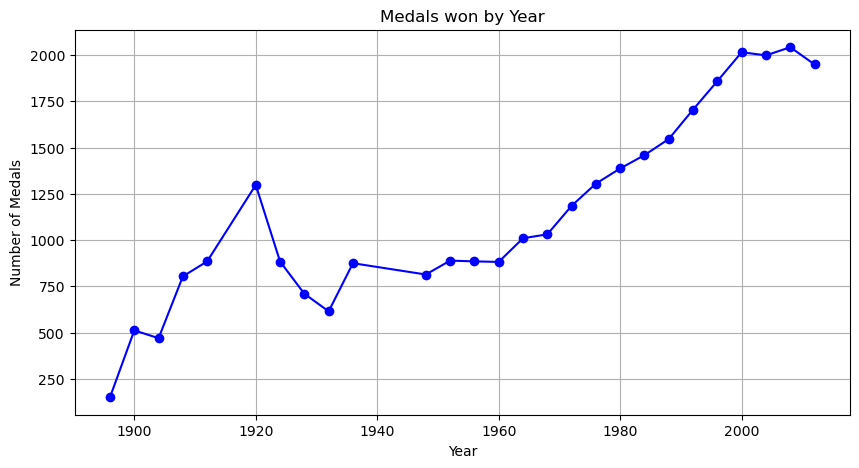

In [5]:
# # Plotting the trend of medals won by year
medals_by_year.plot(kind='line', color='blue', marker='o', figsize=(10,5))
plt.title('Medals won by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid()
plt.show()

In [6]:
# Medals count by Gender
gender_medals = summer_df.groupby('Gender')['Medal'].count()
gender_medals = gender_medals.sort_values(ascending=False)
print(gender_medals)




Gender
Men      22746
Women     8419
Name: Medal, dtype: int64


Gender
Men      22746
Women     8419
Name: count, dtype: int64
Index(['Men', 'Women'], dtype='object', name='Gender')


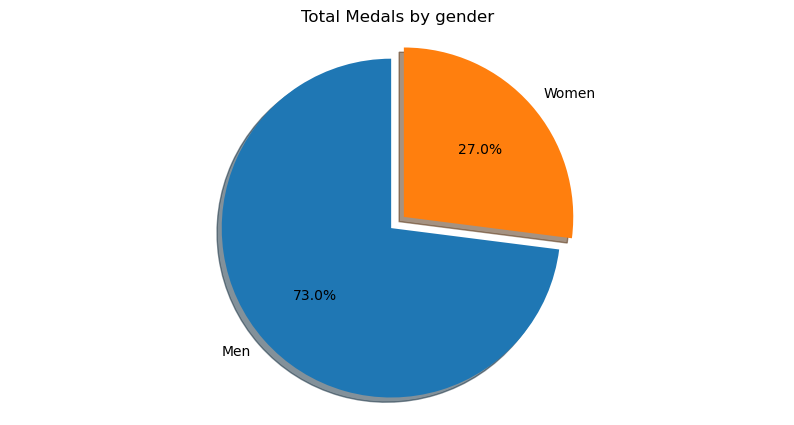

In [14]:
#Pie chart

# Calculae the total number of medals for each gender
total_medals = summer_df['Gender'].value_counts()
print(total_medals)

# perpare data for pie chart

labels = total_medals.index
sizes = total_medals.values
print(labels)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.axis('equal')
plt.title('Total Medals by gender from 1896 to 2012')

plt.show()



In [15]:
# Top Athletes
# Group by athlete and count medals
top_athletes = summer_df.groupby('Athlete')['Medal'].count()
top_athletes = top_athletes.sort_values(ascending=False)
print(top_athletes.head(30))

Athlete
PHELPS, Michael               22
LATYNINA, Larisa              18
ANDRIANOV, Nikolay            15
MANGIAROTTI, Edoardo          13
ONO, Takashi                  13
SHAKHLIN, Boris               13
COUGHLIN, Natalie             12
NEMOV, Alexei                 12
KATO, Sawao                   12
NURMI, Paavo                  12
FISCHER, Birgit               12
THOMPSON, Jenny               12
TORRES, Dara                  12
CASLAVSKA, Vera               11
OSBURN, Carl Townsend         11
SPITZ, Mark                   11
BIONDI, Matthew               11
LOCHTE, Ryan                  11
CHUKARIN, Viktor Ivanovich    11
SCHERBO, Vitaly               10
DITYATIN, Aleksandr           10
NAKAYAMA, Akinori             10
KELETI, Agnes                 10
VAN ALMSICK, Franziska        10
ASTAKHOVA, Polina             10
GEREVICH, Aladar              10
LEWIS, Carl                   10
HALL, Gary Jr.                10
TURISCHEVA, Lyudmila           9
GAUDINI, Giulio                9
Na

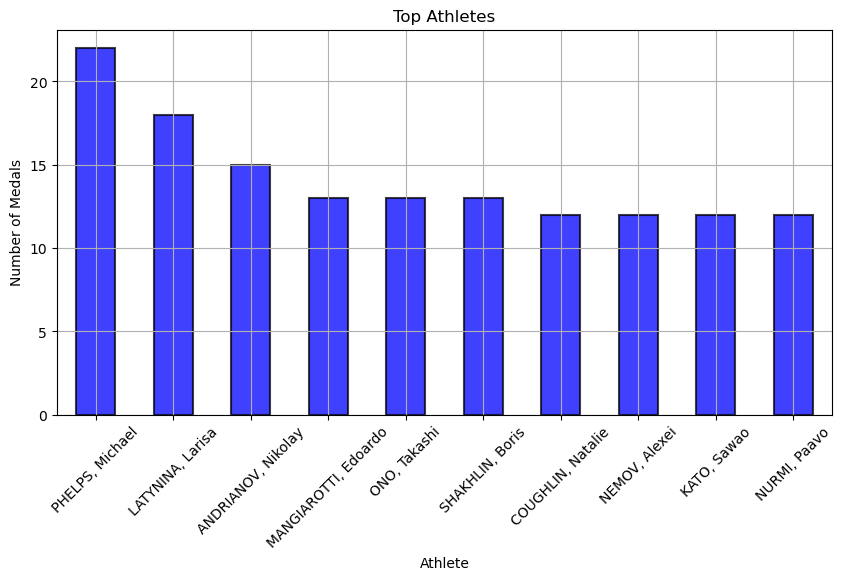

In [16]:
# Plotting the top athletes
top_athletes.head(10).plot(kind='bar', color='blue', figsize=(10,5), grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.title('Top Athletes')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Total Medals by Country
# Group by country and count medals
medals_by_country = summer_df.groupby('Country')['Medal'].count()
medals_by_country = medals_by_country.sort_values(ascending=False)
print(medals_by_country.head(30))


Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
Name: Medal, dtype: int64


In [20]:
# Results medals by country
print(f"The country with the most medals from 1896 to 2014 is {medals_by_country.idxmax()} with {medals_by_country.max()} medals.")
print(f"The country with the least medals from 1896 to 2014 is {medals_by_country.idxmin()} with {medals_by_country.min()} medals.")
print(f"The total number of medals from 1896 to 2014 is {medals_by_country.sum()}.")

The country with the most medals from 1896 to 2014 is USA with 4585 medals.
The country with the least medals from 1896 to 2014 is CIV with 1 medals.
The total number of medals from 1896 to 2014 is 31161.


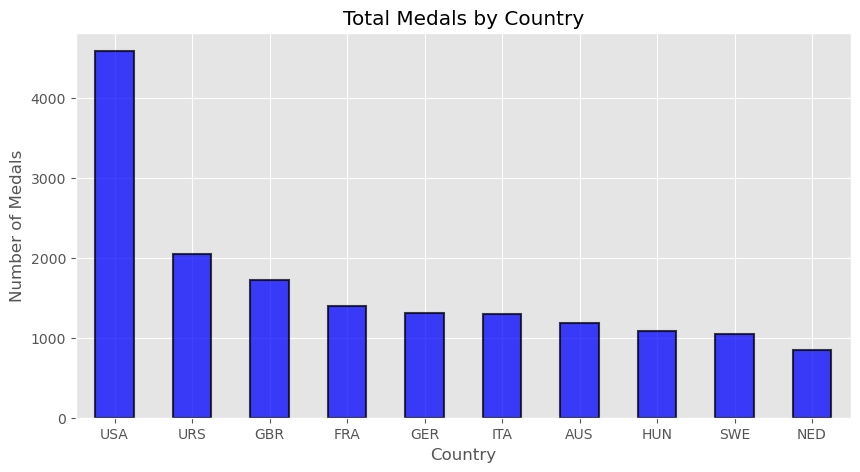

In [59]:
# Plotting the total medals by country
plt.figure(figsize=(10,5))
medals_by_country.head(10).plot(kind='bar', color='blue', grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=360)
plt.title('Total Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

In [11]:
# Medals by Sport
# Group by sport and count medals
medals_by_sport = summer_df.groupby('Sport')['Medal'].count()
medals_by_sport = medals_by_sport.sort_values(ascending=False)
print(medals_by_sport.head(30))




Sport
Aquatics             4170
Athletics            3638
Rowing               2667
Gymnastics           2307
Fencing              1613
Football             1497
Hockey               1422
Wrestling            1212
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         593
Judo                  491
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Modern Pentathlon     180
Softball              180
Table Tennis          144
Badminton             144
Taekwondo             112
Tug of War             94
Canoe                  81
Name: Medal, dtype: int64


In [21]:
# Results medals by sport
print(f"The sport with the most medals from 1896 to 2014 is {medals_by_sport.idxmax()} with {medals_by_sport.max()} medals.")
print(f"The sport with the least medals from 1896 to 2014 is {medals_by_sport.idxmin()} with {medals_by_sport.min()} medals.")
print(f"The total number of medals from 1896 to 2014 is {medals_by_sport.sum()}.")

The sport with the most medals from 1896 to 2014 is Aquatics with 4170 medals.
The sport with the least medals from 1896 to 2014 is Roque with 3 medals.
The total number of medals from 1896 to 2014 is 31165.


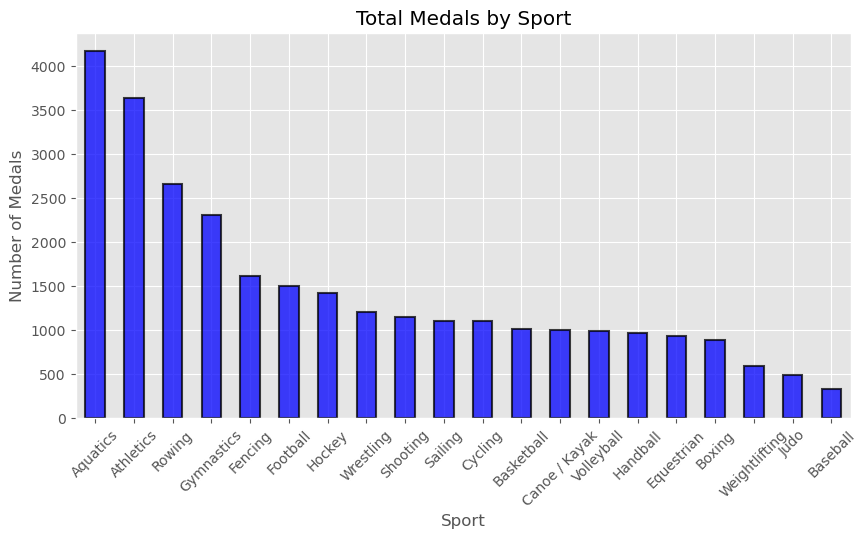

In [60]:
# Plotting the total medals by sport
plt.figure(figsize=(10,5))
medals_by_sport.head(20).plot(kind='bar', color='blue', grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.title('Total Medals by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

Year
2012    190
2000    184
2004    183
1996    180
1992    178
2008    177
1988    163
1984    161
1980    150
1972    150
1976    147
1964    135
1968    135
1960    129
1924    128
1956    127
1912    127
1952    126
1948    126
1920    117
1936    114
1932    114
1928    108
1908     94
1904     82
1900     76
1896     37
Name: Medal, dtype: int64


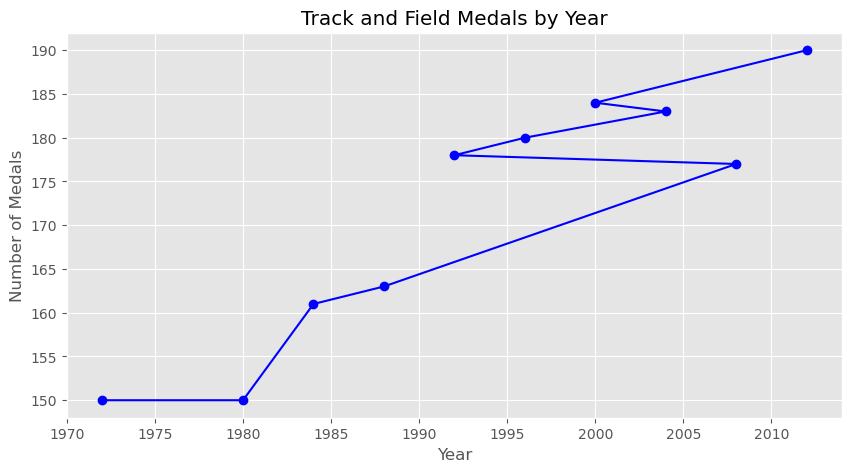

In [77]:
# For specific sport
# Track and field Medal count by year
track_field = summer_df[summer_df['Sport'] == 'Athletics']
track_field = track_field.groupby('Year')['Medal'].count()
track_field = track_field.sort_values(ascending=False)
print(track_field.head(30))

# Plotting the total medals by sport
plt.figure(figsize=(10,5))
track_field.head(10).plot(kind='line', color='blue', marker='o', grid=True)
plt.title('Track and Field Medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()



Country
USA    994
GBR    295
URS    238
GDR    139
FIN    128
JAM    126
GER    107
FRA    106
SWE    103
RUS    100
KEN     86
CAN     84
AUS     84
ITA     72
POL     69
FRG     67
CUB     58
ETH     45
HUN     45
EUA     42
NGR     40
ROU     35
EUN     29
GRE     29
RSA     27
JPN     26
CHN     24
TCH     24
BAH     23
NED     21
Name: Medal, dtype: int64


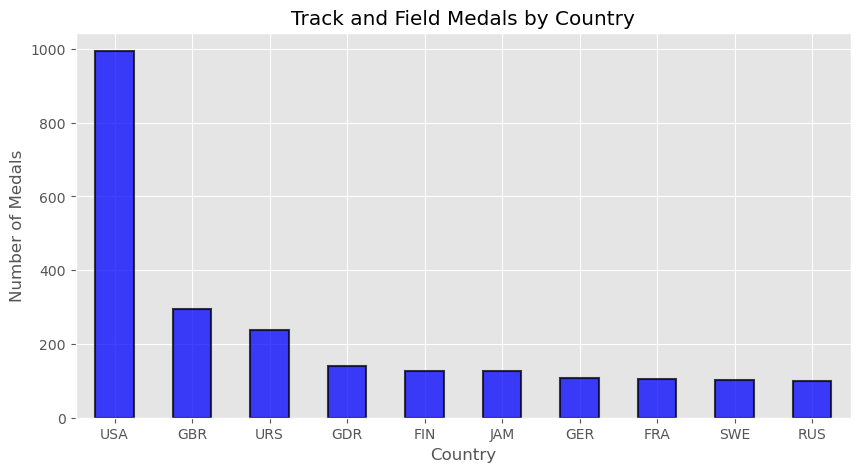

In [83]:
# Track and field Medal count by country
track_field = summer_df[summer_df['Sport'] == 'Athletics']
track_field = track_field.groupby('Country')['Medal'].count()
track_field = track_field.sort_values(ascending=False)
print(track_field.head(30))

# Plotting the total medals for track and field by country
plt.figure(figsize=(10,5))
track_field.head(10).plot(kind='bar', color='blue', grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.title('Track and Field Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=360)
plt.show()

In [25]:
# Results Track and field by country
track_field = summer_df[summer_df['Sport'] == 'Athletics']
track_field = track_field.groupby('Country')['Medal'].count()
#print(track_field)

print(f"The country with the most Track and Field medals from 1896 to 2014 is {track_field.idxmax()} with {track_field.max()} medals.")
print(f"The country with the least Track and Field medals from 1896 to 2014 is {track_field.idxmin()} with {track_field.min()} medals.")
print(f"The total number of Track and Field medals from 1896 to 2014 is {track_field.sum()}.")

The country with the most Track and Field medals from 1896 to 2014 is USA with 994 medals.
The country with the least Track and Field medals from 1896 to 2014 is ANZ with 1 medals.
The total number of Track and Field medals from 1896 to 2014 is 3637.


Country
USA    1184
AUS     400
HUN     250
URS     190
GER     176
CHN     158
JPN     151
RUS     148
GDR     144
GBR     142
NED     142
ITA     127
CAN     119
FRA     110
SWE     101
YUG      91
ESP      67
FRG      62
BEL      53
EUN      45
EUA      31
SRB      27
CRO      27
RSA      24
GRE      22
BRA      19
MEX      18
DEN      17
AUT      15
SCG      13
Name: Medal, dtype: int64


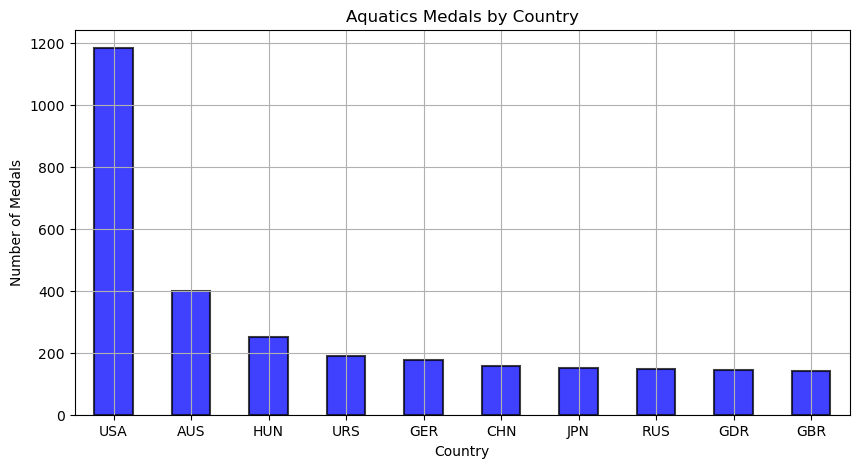

In [26]:
# Aquatics Medal count by country
aquatics = summer_df[summer_df['Sport'] == 'Aquatics']
aquatics = aquatics.groupby('Country')['Medal'].count()
aquatics = aquatics.sort_values(ascending=False)
print(aquatics.head(30))

# Plotting the total medals for Aquatics by country
plt.figure(figsize=(10,5))
aquatics.head(10).plot(kind='bar', color='blue', grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.title('Aquatics Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=360)
plt.show()


In [27]:
# Results Aquatics by country
aquatics = summer_df[summer_df['Sport'] == 'Aquatics']
aquatics = aquatics.groupby('Country')['Medal'].count()
#print(aquatics)

print(f"The country with the most Aquatics medals from 1896 to 2014 is {aquatics.idxmax()} with {aquatics.max()} medals.")
print(f"The country with the least Aquatics medals from 1896 to 2014 is {aquatics.idxmin()} with {aquatics.min()} medals.")
print(f"The total number of Aquatics medals from 1896 to 2014 is {aquatics.sum()}.")

The country with the most Aquatics medals from 1896 to 2014 is USA with 1184 medals.
The country with the least Aquatics medals from 1896 to 2014 is LTU with 1 medals.
The total number of Aquatics medals from 1896 to 2014 is 4170.


Country
USA    364
GBR    244
CAN    197
GDR    183
GER    180
ROU    159
URS    152
ITA    139
AUS    135
NED    117
FRA     96
DEN     73
SUI     70
NZL     64
NOR     52
FRG     50
POL     46
TCH     45
EUA     38
BUL     34
BEL     28
CHN     26
RUS     17
BLR     17
FIN     16
CRO     15
YUG     13
UKR     12
SLO     12
SWE     10
Name: Medal, dtype: int64


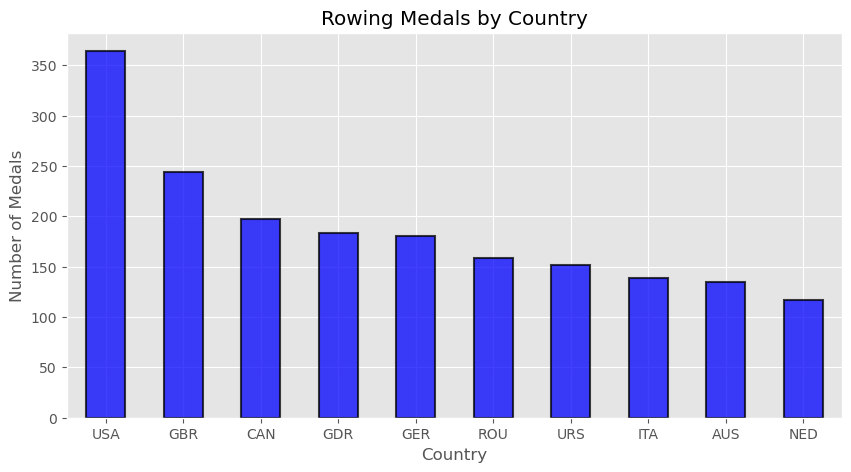

In [85]:
# Rowing Medal count by country
rowing = summer_df[summer_df['Sport'] == 'Rowing']
rowing = rowing.groupby('Country')['Medal'].count()
rowing = rowing.sort_values(ascending=False)
print(rowing.head(30))

# Plotting the total medals for Rowing by country
plt.figure(figsize=(10,5))
rowing.head(10).plot(kind='bar', color='blue', grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.title('Rowing Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=360)
plt.show()

In [28]:
# Results Rowing by country
rowing = summer_df[summer_df['Sport'] == 'Rowing']
rowing = rowing.groupby('Country')['Medal'].count()
#print(rowing)

print(f"The country with the most Rowing medals from 1896 to 2014 is {rowing.idxmax()} with {rowing.max()} medals.")
print(f"The country with the least Rowing medals from 1896 to 2014 is {rowing.idxmin()} with {rowing.min()} medals.")
print(f"The total number of Rowing medals from 1896 to 2014 is {rowing.sum()}.")

The country with the most Rowing medals from 1896 to 2014 is USA with 364 medals.
The country with the least Rowing medals from 1896 to 2014 is RU1 with 1 medals.
The total number of Rowing medals from 1896 to 2014 is 2667.


Country
URS    290
USA    178
JPN    159
ROU    136
SWE    124
CHN    113
HUN    110
RUS    109
ITA    109
NOR    105
FIN     99
DEN     98
GDR     86
SUI     83
TCH     78
GER     71
FRA     52
BEL     48
GBR     46
EUN     30
UKR     27
BLR     25
BUL     23
GRE     21
YUG     18
NED     13
ESP     11
POL      9
KOR      9
EUA      8
Name: Medal, dtype: int64


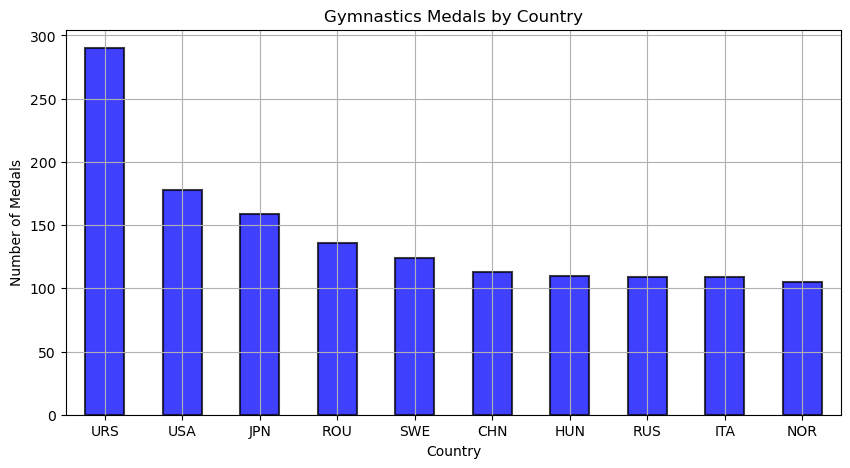

In [29]:
# Gymnastics Medal count by country
gymnastics = summer_df[summer_df['Sport'] == 'Gymnastics']
gymnastics = gymnastics.groupby('Country')['Medal'].count()
gymnastics = gymnastics.sort_values(ascending=False)
print(gymnastics.head(30))

# Plotting the total medals by sport
plt.figure(figsize=(10,5))
gymnastics.head(10).plot(kind='bar', color='blue', grid=True, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.title('Gymnastics Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=360)
plt.show()


In [30]:
# Results Gymnastics by country
gymnastics = summer_df[summer_df['Sport'] == 'Gymnastics']
gymnastics = gymnastics.groupby('Country')['Medal'].count()
#print(gymnastics)

print(f"The country with the most Gymnastics medals from 1896 to 2014 is {gymnastics.idxmax()} with {gymnastics.max()} medals.")
print(f"The country with the least Gymnastics medals from 1896 to 2014 is {gymnastics.idxmin()} with {gymnastics.min()} medals.")
print(f"The total number of Gymnastics medals from 1896 to 2014 is {gymnastics.sum()}.")

The country with the most Gymnastics medals from 1896 to 2014 is URS with 290 medals.
The country with the least Gymnastics medals from 1896 to 2014 is AUS with 1 medals.
The total number of Gymnastics medals from 1896 to 2014 is 2307.


In [31]:
# GDp per Capita by Country
# Load the dataset
gdp_df = pd.read_csv('Resources/dictionary.csv')

# Review the data types
gdp_df.dtypes
gdp_df.describe()
gdp_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [40]:
# drop country column
gdp_df = gdp_df.drop(columns=['Country'])
gdp_df.head()

,Code,Population,GDP per Capita,Country Code
0,AFG,32526562.0,594.323081,AFG
1,ALB,2889167.0,3945.217582,ALB
2,ALG,39666519.0,4206.031232,DZA
3,ASA,55538.0,NaN,None
4,AND,70473.0,NaN,AND


In [41]:
# renmae code to Country
gdp_df = gdp_df.rename(columns={'Code':'Country'})
gdp_df.head()

,Country,Population,GDP per Capita,Country Code
0,AFG,32526562.0,594.323081,AFG
1,ALB,2889167.0,3945.217582,ALB
2,ALG,39666519.0,4206.031232,DZA
3,ASA,55538.0,NaN,None
4,AND,70473.0,NaN,AND


In [42]:
# Merge the datasets
merged_df = pd.merge(summer_df, gdp_df, on='Country', how='left')
merged_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Country Code_x,Population,GDP per Capita,Country Code_y
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,None,9844686.0,12363.543460,HUN
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,None,8611088.0,43774.985174,AUT
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,None,10823732.0,18002.230578,GRC
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,None,10823732.0,18002.230578,GRC
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,None,10823732.0,18002.230578,GRC


In [44]:
#drop  columns country code
merged_df = merged_df.drop(columns=['Country Code_x', 'Country Code_y'])
merged_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,10823732.0,18002.230578


In [47]:
# Check for correlation between a country's GDP per Capita and Medal count

# Group by country and count medals
medals_by_country = merged_df.groupby('Country')['Medal'].count()
medals_by_country = medals_by_country.sort_values(ascending=False)
print(medals_by_country.head(30))




Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
Name: Medal, dtype: int64


In [54]:
# GDP per Capita and Country Medal count
country_gdp = merged_df.groupby('Country')['GDP per Capita'].mean()
country_gdp = country_gdp.sort_values(ascending=False)
print(country_gdp.head(30))
print(f"The country with the highest GDP per Capita is {country_gdp.idxmax()} with {country_gdp.max()}.")
print(f"The country with the lowest GDP per Capita is {country_gdp.idxmin()} with {country_gdp.min()}.")




Country
LUX    101449.968168
SUI     80945.079219
NOR     74400.369777
QAT     73653.394435
IRL     61133.672427
AUS     56310.962993
USA     56115.718426
SIN     52888.744672
DEN     51989.293471
SWE     50579.673649
ISL     50173.339916
NED     44299.768085
GBR     43875.969614
AUT     43774.985174
CAN     43248.529909
HKG     42327.839957
FIN     42311.036231
GER     41313.313995
UAE     40438.762934
BEL     40324.027766
NZL     37807.967276
FRA     36205.568102
ISR     35728.093495
JPN     32477.215145
ITA     29957.804315
KUW     29300.575575
KOR     27221.524051
ESP     25831.582305
CYP     23242.840069
BAH     22817.230857
Name: GDP per Capita, dtype: float64
The country with the highest GDP per Capita is LUX with 101449.968168042.
The country with the lowest GDP per Capita is BDI with 277.068309170914.


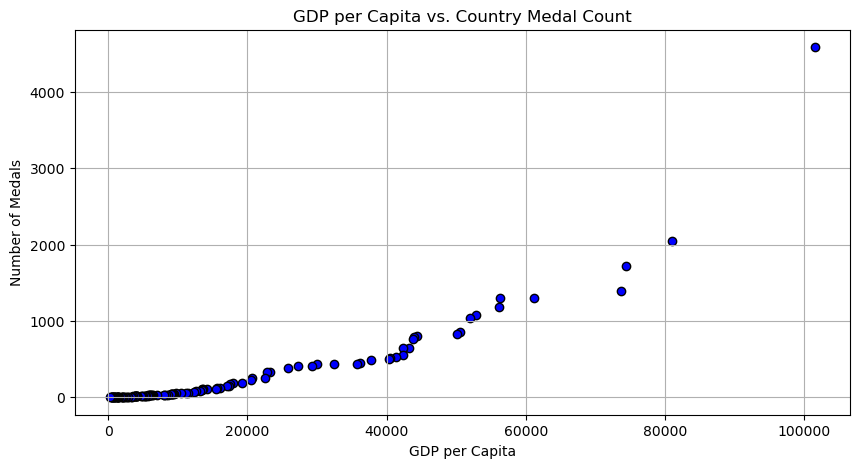

In [52]:

# Create a scatter plot for GDP per Capita and Country Medal count
plt.figure(figsize=(10,5))
plt.scatter(country_gdp, medals_by_country, color='blue', edgecolor='black')
plt.title('GDP per Capita vs. Country Medal Count')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Medals')
plt.grid()
plt.show()